# Seattle Bike Tutorial 

## Exploratory analysis of Seattle bike bridge data. 

Following : http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

Objective to get the hang of proper unit testing. Something I only briefly dabbled in.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fremontData.data import get_fremont_data
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


In [2]:
%matplotlib inline

In [3]:
plt.style.use('seaborn-notebook')

# Get Data 

In [4]:
data = get_fremont_data()

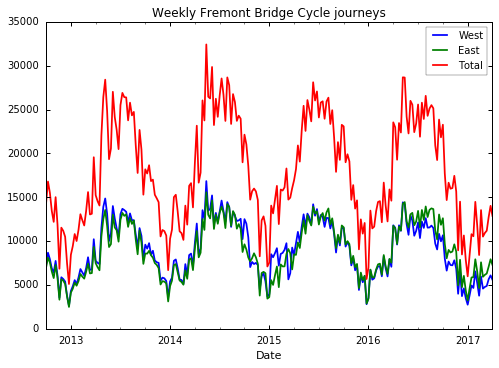

In [5]:
data.resample('W').sum().plot(title='Weekly Fremont Bridge Cycle journeys')

(0, 1100000.0)

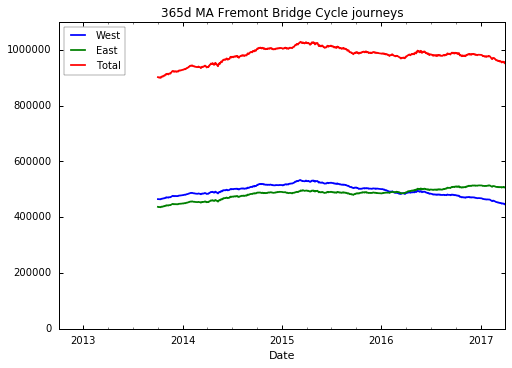

In [6]:

ax = data.resample('D').sum().rolling(365).sum().plot(title='365d MA Fremont Bridge Cycle journeys')
ax.set_ylim(0)

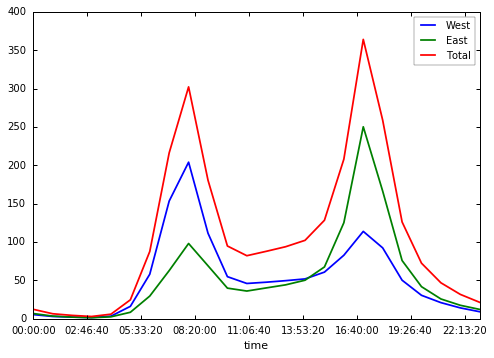

In [7]:
data.groupby(data.index.time).mean().plot()

In [8]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


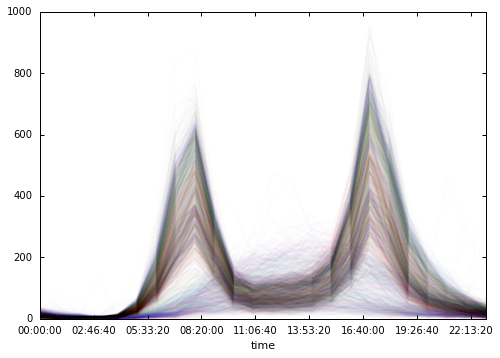

In [9]:
pivoted.plot(legend=False, alpha=0.01)

# Principle Component Analysis

In [10]:
x= pivoted.fillna(0).T.values
x.shape

(1641, 24)

In [11]:
X2 = PCA(2, svd_solver='full').fit_transform(x)
X2.shape

(1641, 2)

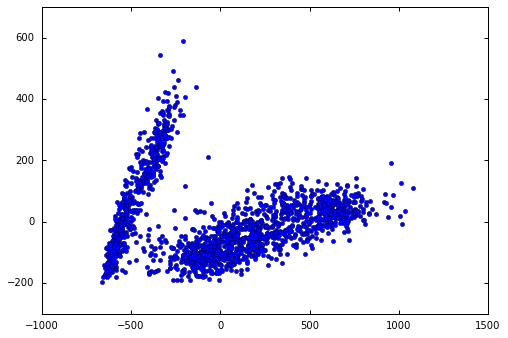

In [12]:
plt.scatter(X2[:,0],X2[:,1])

# Unsupervised Clustering - GMM 

In [13]:
gmm = GaussianMixture(2)
gmm.fit(x)
labels = gmm.predict(x)
labels

array([1, 1, 1, ..., 1, 1, 1])

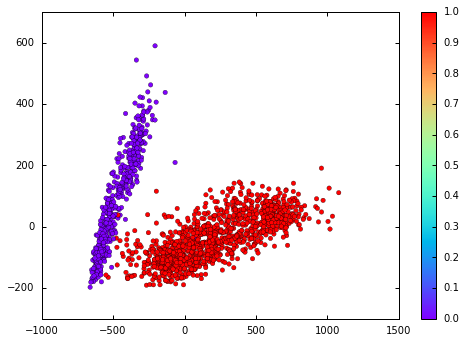

In [14]:
plt.scatter(X2[:,0],X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

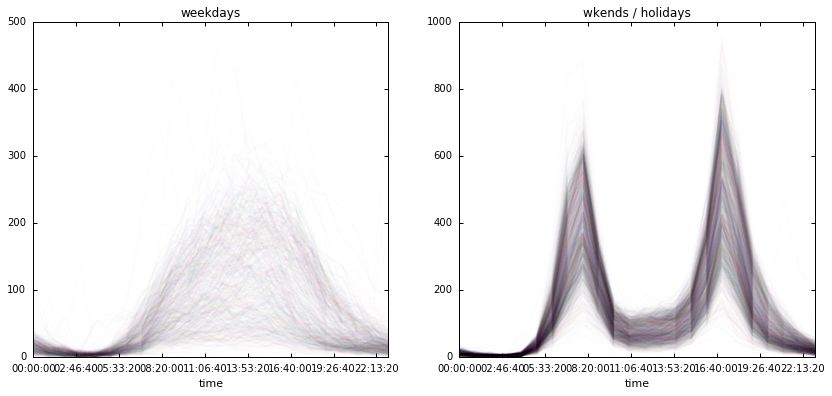

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

pivoted.T[labels==0].T.plot(legend=False, alpha=0.01, ax=ax[0], title="weekdays")
pivoted.T[labels==1].T.plot(legend=False, alpha=0.01, ax=ax[1], title="wkends / holidays")

In [16]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

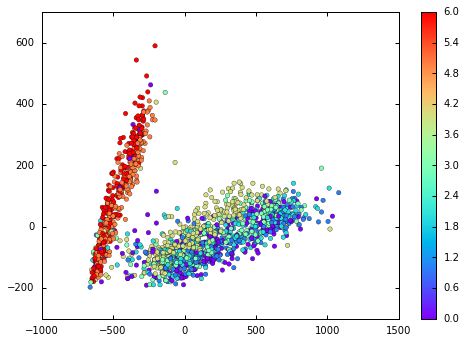

In [17]:
plt.scatter(X2[:,0],X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [18]:
dates = pd.DatetimeIndex(pivoted.columns)

# Analysing outliers

Following points are outliers as they are weekdays that are in the holiday pattern

In [19]:
dates[(labels==1) & (dayofweek<5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
               '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29',
               '2017-03-30', '2017-03-31'],
              dtype='datetime64[ns]', length=1132, freq=None)

The non-obvious one on 6th Feb 2017 - [Snow storm](http://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)